In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import *
from tabulate import tabulate

In [10]:
d1 = 0
d2 = 2
d3 = 0
d4 = 2
d5 = 2
d6 = 1
d7 = 0
d8 = 0
d9 = 7
d10 = 1

a = 4.0 + (abs(d9 - d10)*1e-2)
b = d1 + d2 + d3 + d4
m = 0.20 + ((d5 + d6 + d7 + d8)*1e-3)
n = 3.0 + ((d9 + d10)*1e-2)

print("a = %.4f, b = %.4f, m = %.4f, n = %.4f"%(a, b, m, n))

a = 4.0600, b = 4.0000, m = 0.2030, n = 3.0800


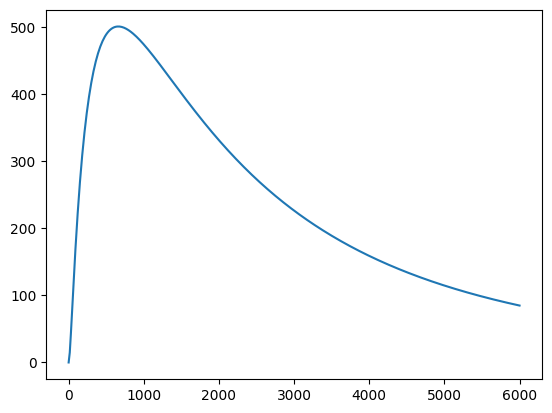

In [15]:
f = lambda x: b*(x**n)*exp(-a*(x**m))

fvectorized = np.vectorize(f)
x = np.linspace(0, 6000, 400)
y = fvectorized(x)
plt.plot(x, y)
plt.show()

Podemos ver potencialmente do gráfico que essa função tem 1 ponto de máximo nesse intervalo e possivelmente 2 pontos de inflexão: 1 mais próximo do 0 e outro entre 1000 e 2000. Calculando as primeiras e segundas derivadas da função (sem explicitar valores de $a$, $b$, $m$, $n$) encontramos:

$$\frac{df}{dx} = b e^{-a x^m} x^{n - 1} (n - am x^m)$$

e 

$$\frac{d^2 f}{dx^2} = b e^{-a x^m} x^{n - 2} \Big\{n^2 - n(1 + 2 a m x^m) + a m x^m \big[ 1 + m ( -1 + a x^m) \big] \Big\}$$

e a derivada terceira (para não termos que calcular numericamente):

$$\frac{d^3 f}{dx^3} = b e^{-a x^m} x^{n - 3} \Big\{ n^3 - 3n^2(1 + a m x^m) + n \big[ 2 - 3a (m - 2) m x^m + 3 a^2 m^2 x^{2m} \big] - a m x^m \big[ 2 + 3m (a x^m - 1) + m^2 (1 - 3 a x^m + a^2 x^{2m} ) \big] \Big\}$$

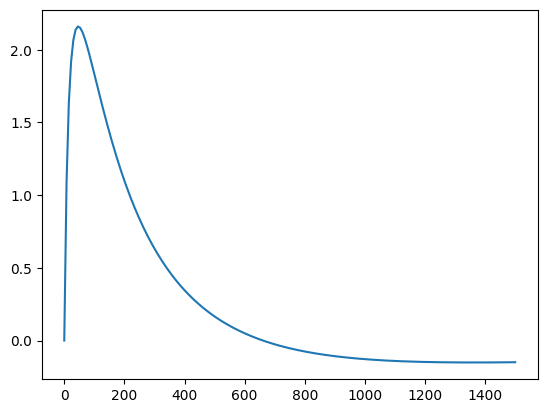

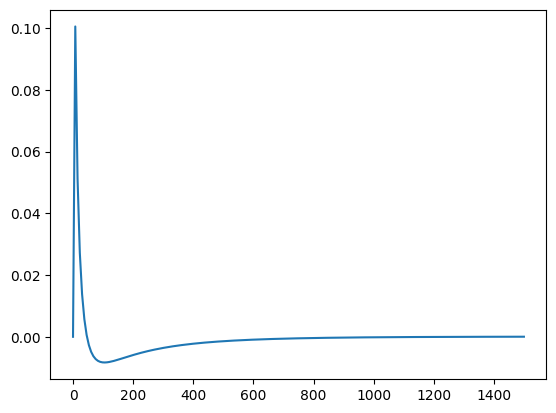

In [45]:
derf = lambda x: b*exp(-a*x**m)*x**(n - 1)*(n - a*m*x**m)
der2f = lambda x: b*exp(-a*x**m)*x**(n - 2)*(n**2 - n*(1 + 2*a*m*x**m) + a*m*x**m*(1 + m*(-1 + a*x**m)))
der3f = lambda x: b*exp(-a*x**m)*x**(n - 3)*(n**3 - (3*n**2)*(1 + a*m*x**m) + n*(2 - 3*a*(m - 2)*m*x**m + 3*(a**2)*(m**2)*x**(2*m)) - a*m*(x**m)*(2 + 3*m*(a*x**m - 1) + (m**2)*(1 - 3*a*x**m + (a**2)*x**(2*m))))

derfvectorized = np.vectorize(derf)
der2fvectorized = np.vectorize(der2f)

x = np.linspace(0, 1500, 200)

yder = derfvectorized(x)
yder2 = der2fvectorized(x)

plt.plot(x, yder)
plt.show()

plt.plot(x, yder2)
plt.show()

De fato temos 1 máximo entre 600 e 800 (zero da derivada primeira) e dois pontos de inflexão (zero da derivada segunda), um próximo de 0 e outro próximo de 1400. Basta aplicarmos o método de Newton a essas funções e encontrar os pontos de máximo e inflexão.

In [42]:
def newton(f, derf, x0, eps, maxiter=100):
    xk = x0
    xk1 = lambda xk: xk - f(xk)/derf(xk)
    ek = lambda xk1, xk: abs(xk1 - xk)

    points = []
    for k in range(maxiter):
        xk1_val = xk1(xk)
        points.append([k, xk, xk1_val, f(xk1_val), ek(xk1_val, xk)/abs(xk1_val)])

        if ek(xk1_val, xk)/abs(xk1_val) < eps:
            break

        xk = xk1_val
    
    return points

In [37]:
points1 = newton(derf, der2f, 600, 1e-2, 1000)
headers = ["k", "xk", "xk+1", "f(xk+1)", "ek/|xk+1|"]
print(tabulate(points1, headers=headers, tablefmt="fancy_grid", floatfmt=".8f"))

╒═════╤══════════════╤══════════════╤════════════╤═════════════╕
│   k │           xk │         xk+1 │    f(xk+1) │   ek/|xk+1| │
╞═════╪══════════════╪══════════════╪════════════╪═════════════╡
│   0 │ 600.00000000 │ 653.89273081 │ 0.00531802 │  0.08241831 │
├─────┼──────────────┼──────────────┼────────────┼─────────────┤
│   1 │ 653.89273081 │ 661.09601327 │ 0.00008023 │  0.01089597 │
├─────┼──────────────┼──────────────┼────────────┼─────────────┤
│   2 │ 661.09601327 │ 661.20805454 │ 0.00000002 │  0.00016945 │
╘═════╧══════════════╧══════════════╧════════════╧═════════════╛


In [50]:
points2 = newton(der2f, der3f, 50, 1e-2, 1000)
headers = ["k", "xk", "xk+1", "f(xk+1)", "ek/|xk+1|"]
print(tabulate(points2, headers=headers, tablefmt="fancy_grid", floatfmt=".8f"))

╒═════╤═════════════╤═════════════╤════════════╤═════════════╕
│   k │          xk │        xk+1 │    f(xk+1) │   ek/|xk+1| │
╞═════╪═════════════╪═════════════╪════════════╪═════════════╡
│   0 │ 50.00000000 │ 46.00290359 │ 0.00020006 │  0.08688792 │
├─────┼─────────────┼─────────────┼────────────┼─────────────┤
│   1 │ 46.00290359 │ 46.39059762 │ 0.00000219 │  0.00835717 │
╘═════╧═════════════╧═════════════╧════════════╧═════════════╛


In [51]:
points3 = newton(der2f, der3f, 1300, 1e-2, 1000)
headers = ["k", "xk", "xk+1", "f(xk+1)", "ek/|xk+1|"]
print(tabulate(points3, headers=headers, tablefmt="fancy_grid", floatfmt=".8f"))

╒═════╤═══════════════╤═══════════════╤═════════════╤═════════════╕
│   k │            xk │          xk+1 │     f(xk+1) │   ek/|xk+1| │
╞═════╪═══════════════╪═══════════════╪═════════════╪═════════════╡
│   0 │ 1300.00000000 │ 1356.02520263 │ -0.00000142 │  0.04131575 │
├─────┼───────────────┼───────────────┼─────────────┼─────────────┤
│   1 │ 1356.02520263 │ 1362.51579357 │ -0.00000002 │  0.00476368 │
╘═════╧═══════════════╧═══════════════╧═════════════╧═════════════╛
